<a href="https://colab.research.google.com/github/JGSukumar/AI-AMRITA/blob/main/Pandas/PandasTutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/hdrive')

Mounted at /content/hdrive


In [5]:
DatasetBaseFolder = '/content/hdrive/MyDrive/ColabNotebooks/PandasTl/Datasets/'

In [6]:
movies_df = pd.read_csv(DatasetBaseFolder+"IMDB-Movie-Data.csv", index_col="Title")

In [7]:
movies_df

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...
Secret in Their Eyes,996,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
Hostel: Part II,997,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
Step Up 2: The Streets,998,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0


To See first 5 rows

In [8]:
movies_df.head(5)

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


To See last 5 Rows

In [9]:
movies_df.tail(5)

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Secret in Their Eyes,996,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
Hostel: Part II,997,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
Step Up 2: The Streets,998,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
Search Party,999,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
Nine Lives,1000,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


To check how many rows and columns are there

In [10]:
movies_df.shape

(1000, 11)

To get an overview of the dataset

In [12]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, Guardians of the Galaxy to Nine Lives
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Genre               1000 non-null   object 
 2   Description         1000 non-null   object 
 3   Director            1000 non-null   object 
 4   Actors              1000 non-null   object 
 5   Year                1000 non-null   int64  
 6   Runtime (Minutes)   1000 non-null   int64  
 7   Rating              1000 non-null   float64
 8   Votes               1000 non-null   int64  
 9   Revenue (Millions)  872 non-null    float64
 10  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 133.8+ KB


If you want to get remove the repeat cases

In [13]:
movies_df=movies_df.drop_duplicates(keep="first")

Now checking again after removing duplicates.
So there are no duplicates in our data.

In [14]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, Guardians of the Galaxy to Nine Lives
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Genre               1000 non-null   object 
 2   Description         1000 non-null   object 
 3   Director            1000 non-null   object 
 4   Actors              1000 non-null   object 
 5   Year                1000 non-null   int64  
 6   Runtime (Minutes)   1000 non-null   int64  
 7   Rating              1000 non-null   float64
 8   Votes               1000 non-null   int64  
 9   Revenue (Millions)  872 non-null    float64
 10  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 133.8+ KB


To rename columns
First we want to know what are the column names

In [15]:
movies_df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

Now renaming columns

In [16]:
movies_df.rename(columns={'Runtime (Minutes)' : 'Runtime', 'Revenue (Millions)' : 'Revenue_Millions', 'Director' : 'Directors'}, inplace=True)

Checking again column names

In [17]:
movies_df.columns

Index(['Rank', 'Genre', 'Description', 'Directors', 'Actors', 'Year',
       'Runtime', 'Rating', 'Votes', 'Revenue_Millions', 'Metascore'],
      dtype='object')

To chech number of null entries in columns

In [18]:
movies_df.isnull()

,Rank,Genre,Description,Directors,Actors,Year,Runtime,Rating,Votes,Revenue_Millions,Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,False,False,False,False,False,False,False,False,False,False,False
Prometheus,False,False,False,False,False,False,False,False,False,False,False
Split,False,False,False,False,False,False,False,False,False,False,False
Sing,False,False,False,False,False,False,False,False,False,False,False
Suicide Squad,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
Secret in Their Eyes,False,False,False,False,False,False,False,False,False,True,False
Hostel: Part II,False,False,False,False,False,False,False,False,False,False,False
Step Up 2: The Streets,False,False,False,False,False,False,False,False,False,False,False


TO count number of null columns

In [19]:
movies_df.isnull().sum()

Rank                  0
Genre                 0
Description           0
Directors             0
Actors                0
Year                  0
Runtime               0
Rating                0
Votes                 0
Revenue_Millions    128
Metascore            64
dtype: int64

To remove null values

In [20]:
movies_dfTmp=movies_df.dropna(axis=0)

Now checking again no of rows and columns

In [22]:
movies_dfTmp.shape

(838, 11)

To drop columns containing null values

In [23]:
movies_dfTmp=movies_df.dropna(axis=1)

Now checking again no of roes and columns

In [24]:
movies_dfTmp.shape

(1000, 9)

Calculating the mean

In [26]:
revenue=movies_df['Revenue_Millions']
revenue.head(5)

Title
Guardians of the Galaxy    333.13
Prometheus                 126.46
Split                      138.12
Sing                       270.32
Suicide Squad              325.02
Name: Revenue_Millions, dtype: float64

To add mean revenue in null places

In [27]:
meanRev = revenue.mean(0)
revenue.fillna(meanRev, inplace=True)

Now checking again null values

In [28]:
movies_df.isnull().sum()

Rank                 0
Genre                0
Description          0
Directors            0
Actors               0
Year                 0
Runtime              0
Rating               0
Votes                0
Revenue_Millions     0
Metascore           64
dtype: int64

To describe the dataset

In [30]:
movies_df.describe()

,Rank,Year,Runtime,Rating,Votes,Revenue_Millions,Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,96.412043,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,17.442500,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,60.375000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,99.177500,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [35]:
rating = movies_df['Rating']
rating[rating.gt(8.5)]

Title
Interstellar        8.6
The Dark Knight     9.0
Inception           8.8
Kimi no na wa       8.6
Dangal              8.8
The Intouchables    8.6
Name: Rating, dtype: float64

To count

In [32]:
movies_df['Genre'].value_counts()

Action,Adventure,Sci-Fi    50
Drama                      48
Comedy,Drama,Romance       35
Comedy                     32
Drama,Romance              31
                           ..
Action,Horror,Romance       1
Action,Comedy,Sport         1
Comedy,Horror,Romance       1
Adventure,Drama,History     1
Drama,Family,Music          1
Name: Genre, Length: 207, dtype: int64

To find corelation

In [33]:
movies_df.corr()

,Rank,Year,Runtime,Rating,Votes,Revenue_Millions,Metascore
Rank,1.000000,-0.261605,-0.221739,-0.219555,-0.283876,-0.252996,-0.191869
Year,-0.261605,1.000000,-0.164900,-0.211219,-0.411904,-0.117562,-0.079305
Runtime,-0.221739,-0.164900,1.000000,0.392214,0.407062,0.247834,0.211978
Rating,-0.219555,-0.211219,0.392214,1.000000,0.511537,0.189527,0.631897
Votes,-0.283876,-0.411904,0.407062,0.511537,1.000000,0.607941,0.325684
Revenue_Millions,-0.252996,-0.117562,0.247834,0.189527,0.607941,1.000000,0.133328
Metascore,-0.191869,-0.079305,0.211978,0.631897,0.325684,0.133328,1.000000


Slicing along columns

In [34]:
subset = movies_df[['Genre', 'Rating']]
type(subset)

pandas.core.frame.DataFrame

Slicing along rows

In [36]:
movies_df.loc['Prometheus']
movies_df.iloc[1]

Rank                                                                2
Genre                                        Adventure,Mystery,Sci-Fi
Description         Following clues to the origin of mankind, a te...
Directors                                                Ridley Scott
Actors              Noomi Rapace, Logan Marshall-Green, Michael Fa...
Year                                                             2012
Runtime                                                           124
Rating                                                              7
Votes                                                          485820
Revenue_Millions                                               126.46
Metascore                                                          65
Name: Prometheus, dtype: object

In [37]:
movie_subset = movies_df.iloc[1:4]
movie_subset

,Rank,Genre,Description,Directors,Actors,Year,Runtime,Rating,Votes,Revenue_Millions,Metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0


To select movies based on directors

In [39]:
moviesByRidley = movies_df[(movies_df['Directors'] == "Ridley Scott")]
moviesByRidley.head(5)

,Rank,Genre,Description,Directors,Actors,Year,Runtime,Rating,Votes,Revenue_Millions,Metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
The Martian,103,"Adventure,Drama,Sci-Fi",An astronaut becomes stranded on Mars after hi...,Ridley Scott,"Matt Damon, Jessica Chastain, Kristen Wiig, Ka...",2015,144,8.0,556097,228.43,80.0
Robin Hood,388,"Action,Adventure,Drama","In 12th century England, Robin and his band of...",Ridley Scott,"Russell Crowe, Cate Blanchett, Matthew Macfady...",2010,140,6.7,221117,105.22,53.0
American Gangster,471,"Biography,Crime,Drama","In 1970s America, a detective works to bring d...",Ridley Scott,"Denzel Washington, Russell Crowe, Chiwetel Eji...",2007,157,7.8,337835,130.13,76.0
Exodus: Gods and Kings,517,"Action,Adventure,Drama",The defiant leader Moses rises up against the ...,Ridley Scott,"Christian Bale, Joel Edgerton, Ben Kingsley, S...",2014,150,6.0,137299,65.01,52.0


To select movies based on directors and ratings

In [51]:
moviesByRidley = movies_df[(movies_df['Directors'] == "Ridley Scott") & movies_df['Rating'].gt(7)]
moviesByRidley.head(5)

,Rank,Genre,Description,Directors,Actors,Year,Runtime,Rating,Votes,Revenue_Millions,Metascore
Title,,,,,,,,,,,
The Martian,103,"Adventure,Drama,Sci-Fi",An astronaut becomes stranded on Mars after hi...,Ridley Scott,"Matt Damon, Jessica Chastain, Kristen Wiig, Ka...",2015,144,8.0,556097,228.43,80.0
American Gangster,471,"Biography,Crime,Drama","In 1970s America, a detective works to bring d...",Ridley Scott,"Denzel Washington, Russell Crowe, Chiwetel Eji...",2007,157,7.8,337835,130.13,76.0
Body of Lies,738,"Action,Drama,Romance",A CIA agent on the ground in Jordan hunts down...,Ridley Scott,"Leonardo DiCaprio, Russell Crowe, Mark Strong,...",2008,128,7.1,182305,39.38,57.0


To check all movies that were released between 2005 and 2010, have a rating above 8.0, but made below the 25th percentile in revenue.

In [56]:
movies_df[
    ((movies_df['Year'] >= 2005) & (movies_df['Year'] <= 2010))
    & (movies_df['Rating'] > 8.0)
    & (movies_df['Revenue_Millions'] < movies_df['Revenue_Millions'].quantile(0.25))
]

,Rank,Genre,Description,Directors,Actors,Year,Runtime,Rating,Votes,Revenue_Millions,Metascore
Title,,,,,,,,,,,
3 Idiots,431,"Comedy,Drama",Two friends are searching for their long lost ...,Rajkumar Hirani,"Aamir Khan, Madhavan, Mona Singh, Sharman Joshi",2009,170,8.4,238789,6.52,67.0
The Lives of Others,477,"Drama,Thriller","In 1984 East Berlin, an agent of the secret po...",Florian Henckel von Donnersmarck,"Ulrich Mühe, Martina Gedeck,Sebastian Koch, Ul...",2006,137,8.5,278103,11.28,89.0
Incendies,714,"Drama,Mystery,War",Twins journey to the Middle East to discover t...,Denis Villeneuve,"Lubna Azabal, Mélissa Désormeaux-Poulin, Maxim...",2010,131,8.2,92863,6.86,80.0
Taare Zameen Par,992,"Drama,Family,Music",An eight-year-old boy is thought to be a lazy ...,Aamir Khan,"Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...",2007,165,8.5,102697,1.20,42.0


In [57]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)})

For categorical variables utilize Bar Charts* and Boxplots.
For continuous variables utilize Histograms, Scatterplots, Line graphs, and Boxplots.

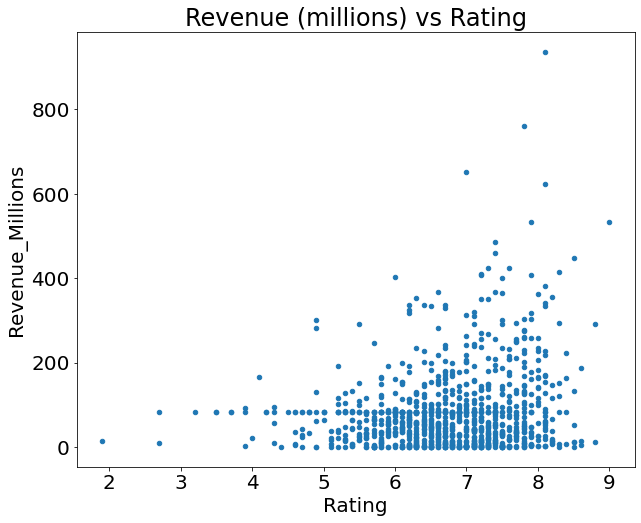

In [65]:
movies_df.plot(kind='scatter', x='Rating', y='Revenue_Millions', title='Revenue (millions) vs Rating');

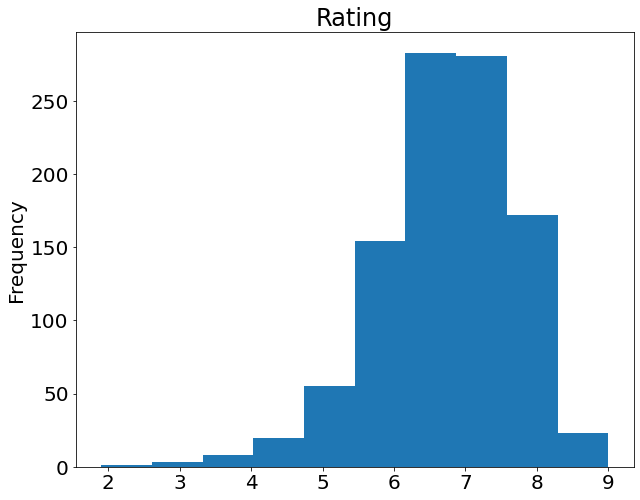

In [66]:
movies_df['Rating'].plot(kind='hist', title='Rating');

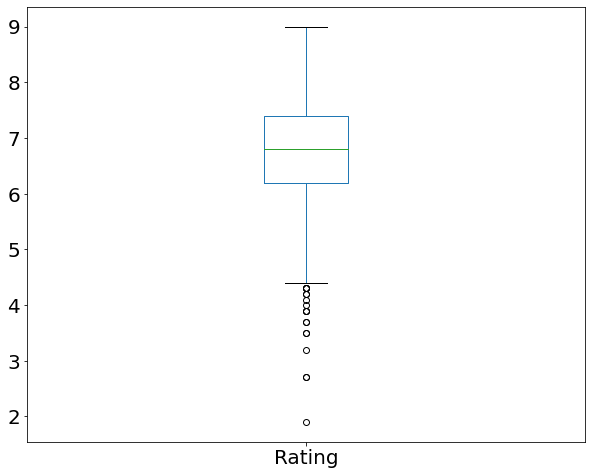

In [67]:
movies_df['Rating'].plot(kind="box");